In [57]:
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
import os

import importlib 

import simulation 
import utils
import copy

In [89]:
base_params_dict = {
    "N": 1000, # Population size
    # "u": 0.01, # Environmental change rate
    "u": 0.0001,
    "c_I": 0.05, # Cost of individual learning
    "c_AI": 0.0, # Cost of AI update
    "z": 0.66, # Success rate of individual learning
    "s0": 0.85, # Survival probability (non-adapted)
    "s1": 0.93, # Survival probability (adapted)
    "phi": 1., # AI bias parameter
    "epsilon_I": 0.0,  # Social learning error rate for humans
    "epsilon_AI": 0.0, # Social learning error rate for AI
    "mu": 0.005, # Mutation rate
    "n_records": 200000, # Number of steps to average over
    "social_learning_mode": "both", # Who can agents socially learn from: "", "human", "ai", "both"
    "resignation": False, 
    "resignation_hint": 1,
    "ai_individ_learn": False,
    "critical": False, # Is critical social learning enabled
    "ind_penalty_mult": 1., # How much is individual learning probability multiplied by after learning from AI
    "learn_twice": False, # Should agent have second opportunity to learn if first one fails (only one of critical and learn_twice should be on at a time)
    "sim_name": "base" # Name of current simulation (will be used in figure filenames)
}

## Baseline simulation 2A
### Individual learning only

collective model understanding


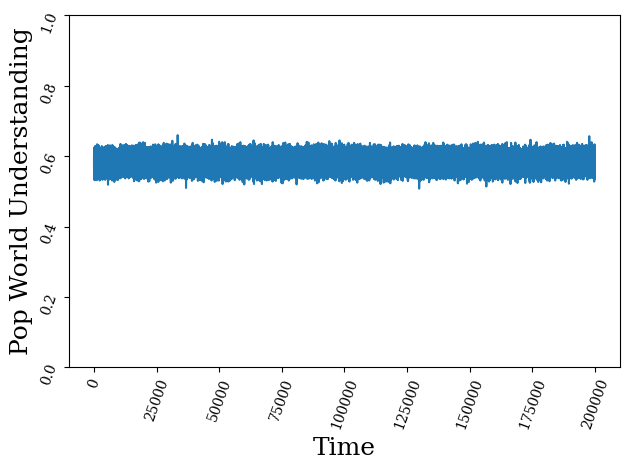

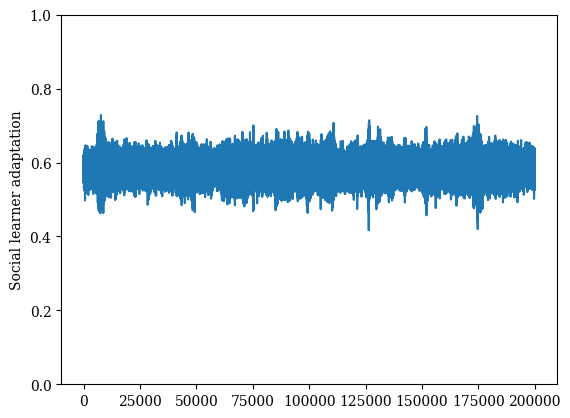

0.5830798549999999


In [59]:
importlib.reload(utils)
importlib.reload(simulation)

%matplotlib inline

params_dict = copy.copy(base_params_dict) 
params_dict['social_learning_mode'] = ''
params_dict['sim_name'] = 'sec_2_baseline_individual_only'


social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

In [60]:
# plt.scatter( social_learner_freqs, social_learner_adaptation,alpha=0.5)
# plt.xlabel("Social Learner Freq", fontsize=18)
# plt.ylabel("Pop World Understanding", fontsize=18)

## Baseline simulation 2B
### Agents can learn individually or socially, but not both
### Agents can learn socially from other people

collective model understanding


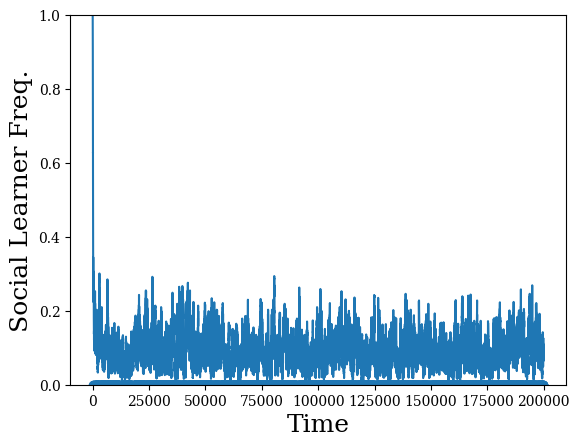

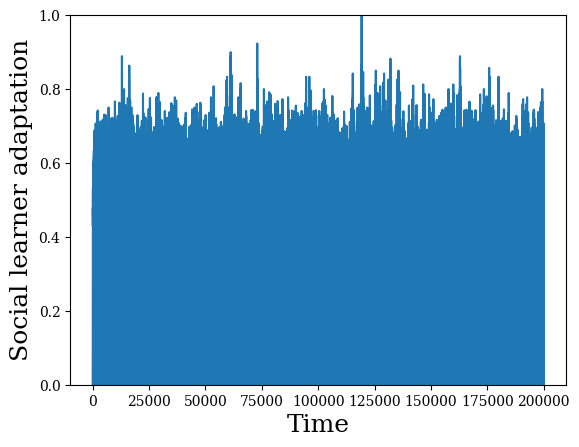

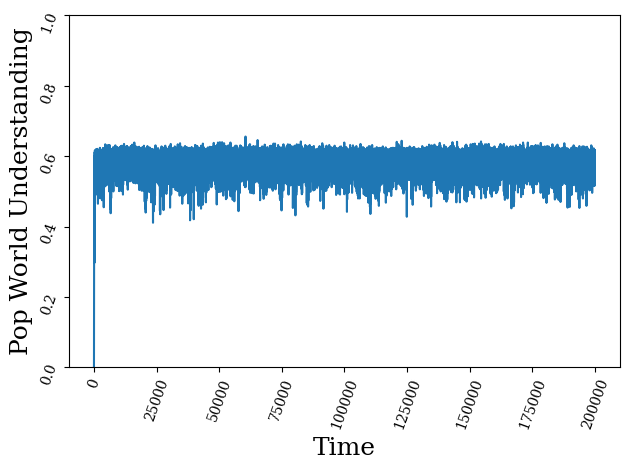

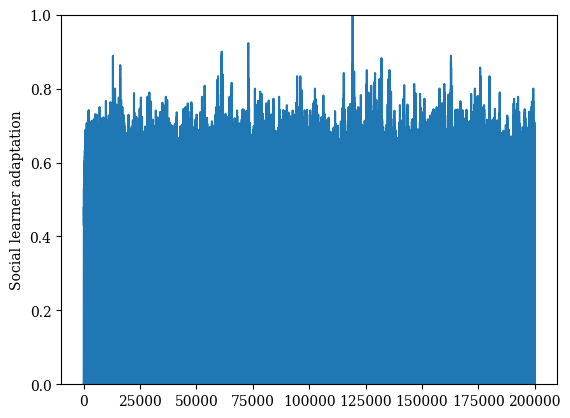

0.5780695899999999


In [61]:
params_dict = copy.copy(base_params_dict) 
params_dict['social_learning_mode'] = 'human'
params_dict['sim_name'] = 'sec_2_baseline_original_RP'


social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

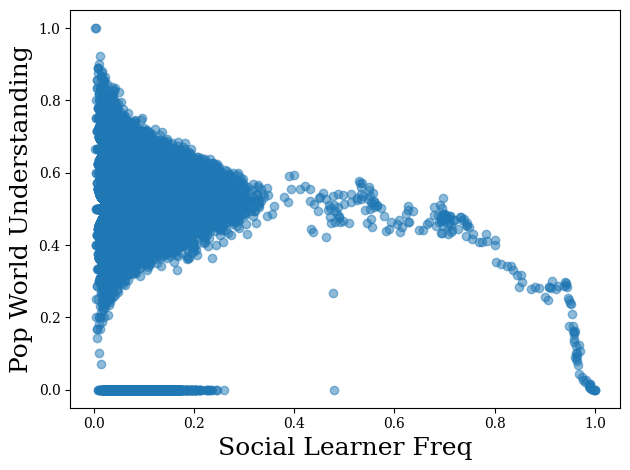

In [63]:
plt.scatter( social_learner_freqs, social_learner_adaptation,alpha=0.5)
plt.xlabel("Social Learner Freq", fontsize=18)
plt.ylabel("Pop World Understanding", fontsize=18)
plt.tight_layout()
plt.savefig('figures/base_social_learn_freq_rp.pdf', dpi=400)

## Baseline simulation 2C
### Agents can learn individually or socially, but not both
### Agents can learn socially from other people, or socially from the AI
### AI learns socially from the mean the population

collective model understanding


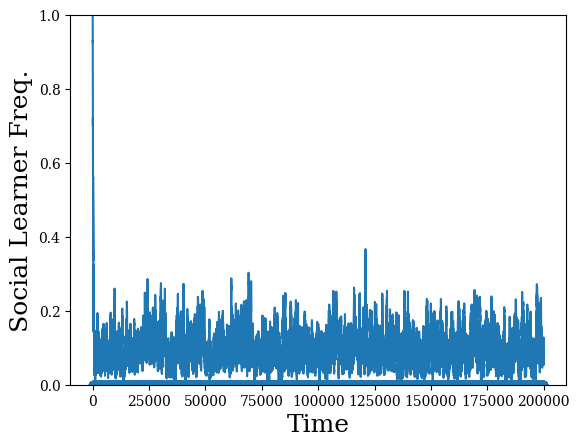

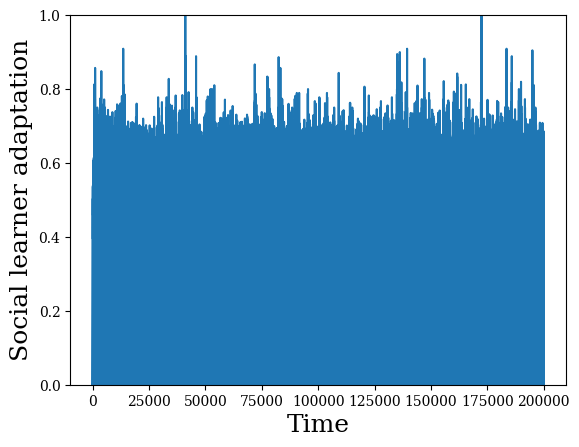

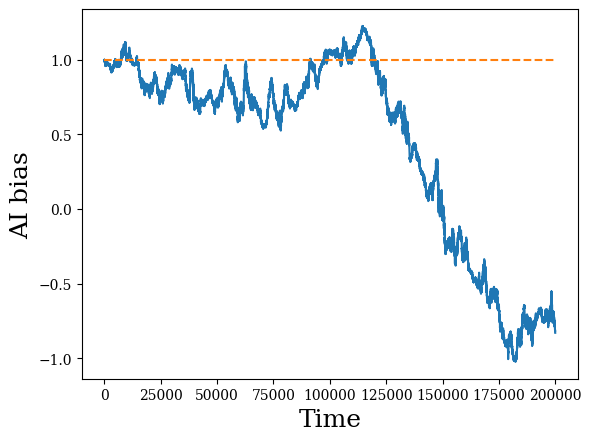

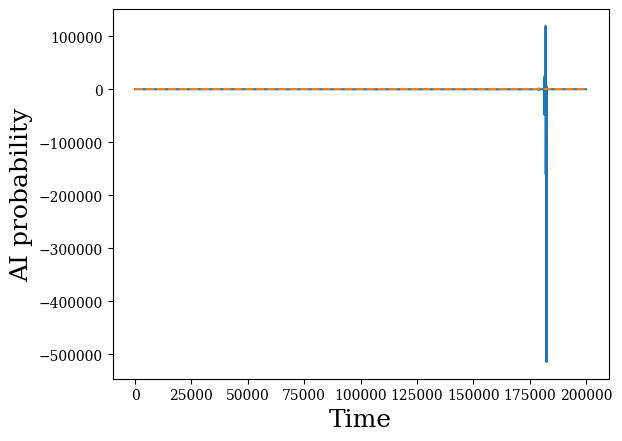

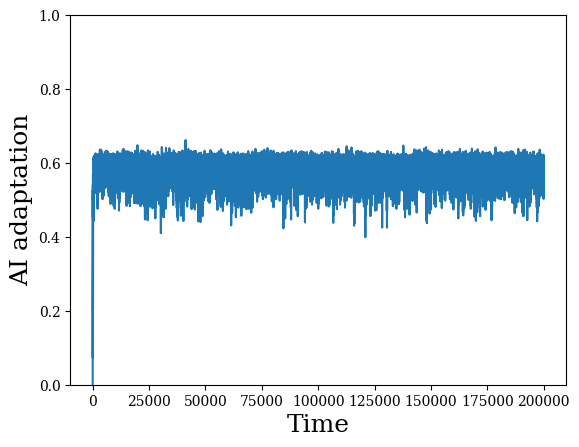

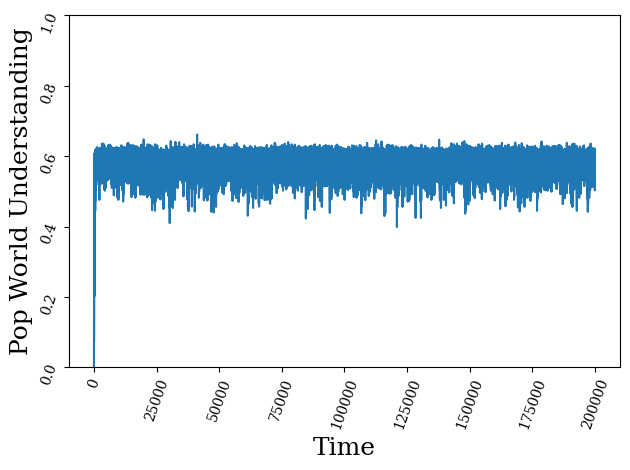

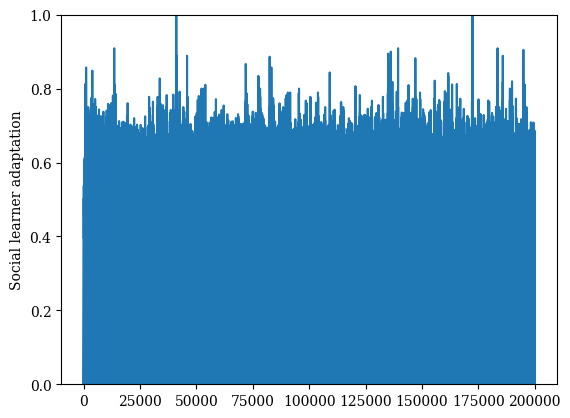

0.5779233149999999


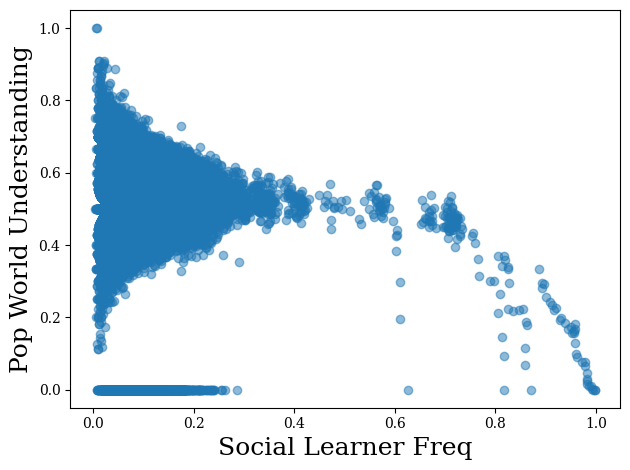

In [64]:
params_dict = copy.copy(base_params_dict) 
params_dict['social_learning_mode'] = 'both'
params_dict['sim_name'] = 'sec_2_baseline_ai'


social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

plt.scatter( social_learner_freqs, social_learner_adaptation,alpha=0.5)
plt.xlabel("Social Learner Freq", fontsize=18)
plt.ylabel("Pop World Understanding", fontsize=18)
plt.tight_layout()
plt.savefig('figures/base_ai_social_learn_freq_rp.pdf', dpi=400)

### Technically, conditional learning is "cheating" because you get to make 2 attempts in one timestep, 
### so this next cell is the normal RP setup but everyone gets to repeat their action a second time if it fails, as a "fairer" baseline
### Exclude this from current paper, but actually this is key result undermining critical social learning literature conclusions. 
### Note: Fitness stays near maximal limit until individual learning probability falls below environment change rate

collective model understanding


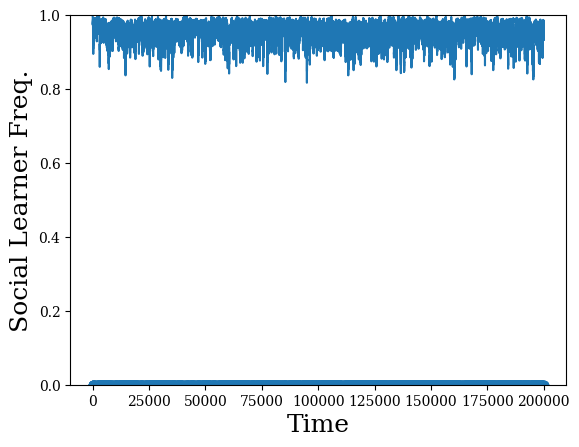

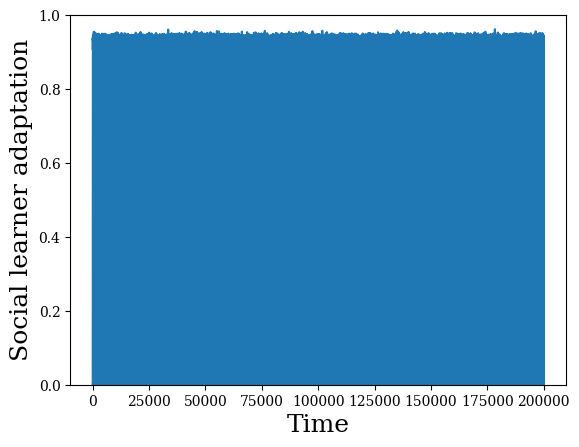

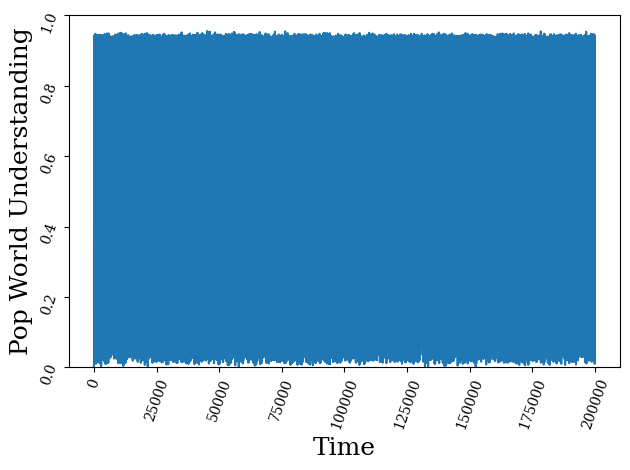

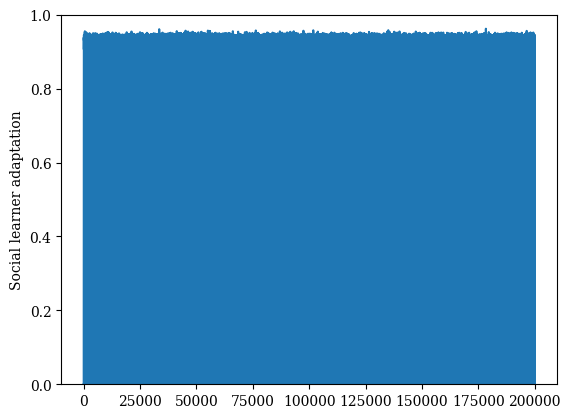

0.88236954


In [65]:
params_dict = copy.copy(base_params_dict) 
params_dict['social_learning_mode'] = 'human'
params_dict['learn_twice'] = True
params_dict['sim_name'] = 'sec_exclude_baseline_ai_learn_twice'


social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

## Simulation 3.1.1: "Choose who to learn from"
### Agents learn from AI/other humans or individually
### AI learns socially from mean
### AI unavailable if E[AI]<E[I]
### Note: this is essentially a "who" strategy and as a result it doesn't work

collective model understanding


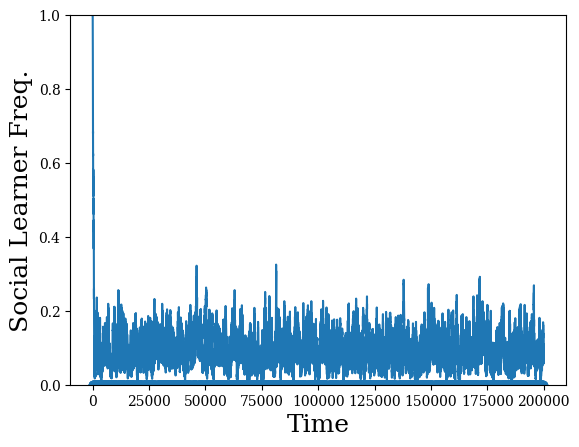

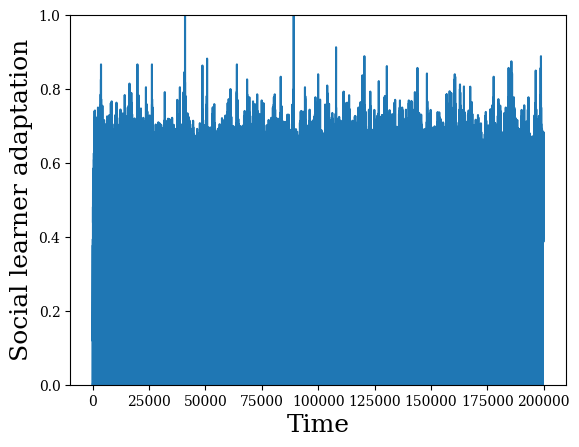

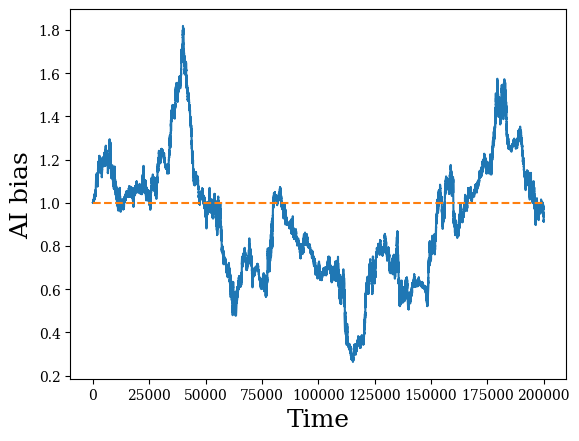

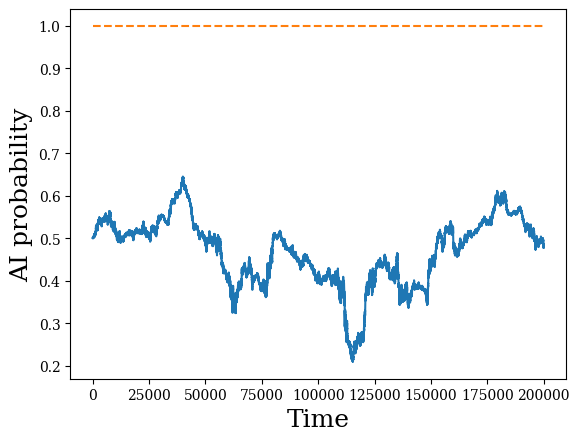

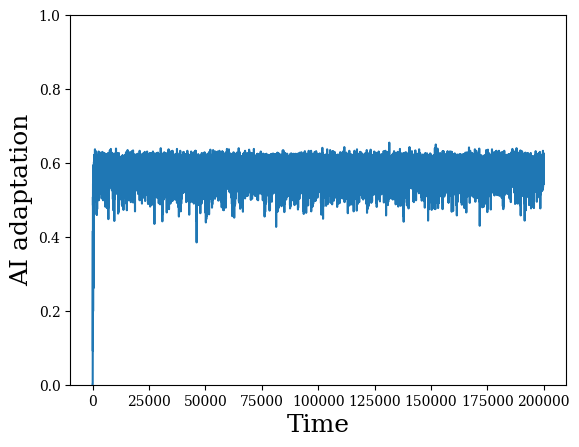

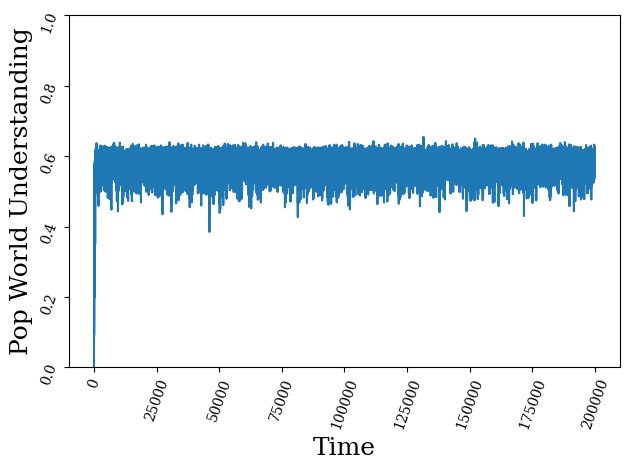

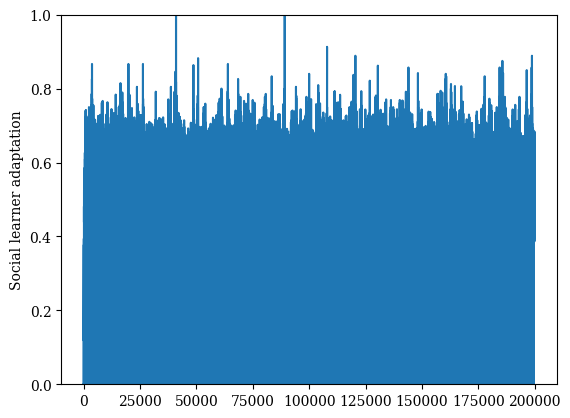

0.57793946


In [66]:
params_dict = copy.copy(base_params_dict) 
params_dict['social_learning_mode'] = 'both'
params_dict['resignation'] = True # Should AI resign if E[AI]<E[I]
params_dict['resignation_hint'] = 1.0 #When AI resigns it should provide a hint that decreases cost of ind learning by this multiplier
params_dict['sim_name'] = 'sec_exclude_baseline_ai_learn_twice'

social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], 
    mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], resignation=params_dict["resignation"], 
    resignation_hint=params_dict["resignation_hint"], critical=params_dict["critical"], 
    ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

## Simulation 3.1.2: "Override AI outputs"
### Agents are critical social learners who first try to learn socially from the AI, and individually if it fails
### AI learns socially from the mean of the population

collective model understanding


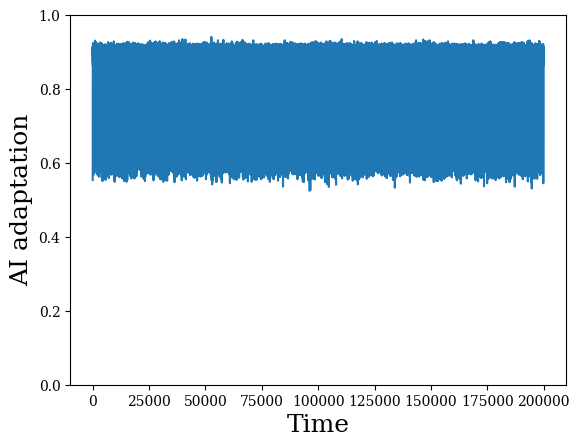

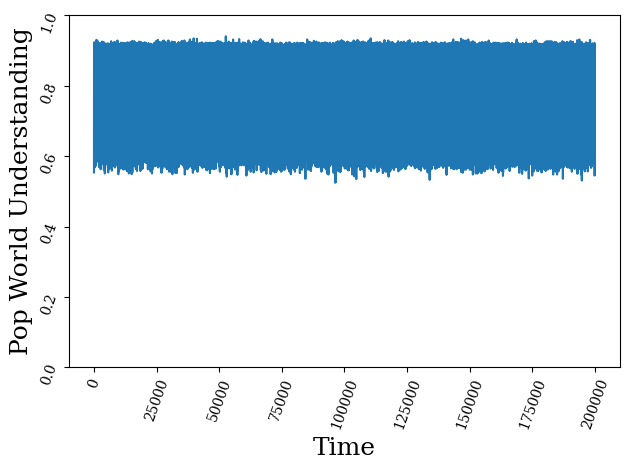

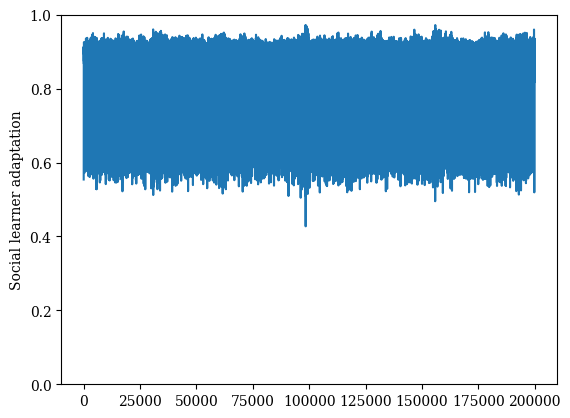

0.8881822199999997


In [79]:
params_dict = copy.copy(base_params_dict) 
params_dict['social_learning_mode'] = 'ai'
params_dict['u'] = 0.01
params_dict['critical'] = True 
params_dict['sim_name'] = 'sec_3_1_2_override'


social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

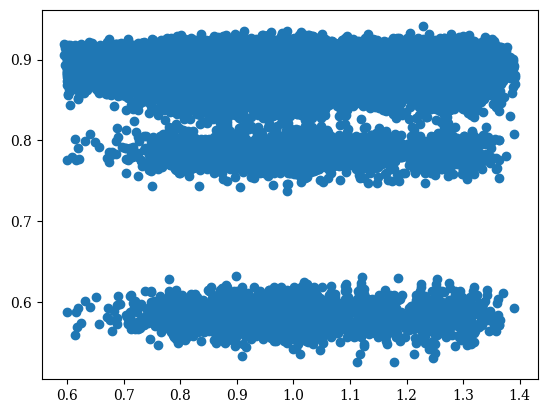

In [88]:
# social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation
plt.scatter(ai_bias_means, learner_adaptation)

collective model understanding


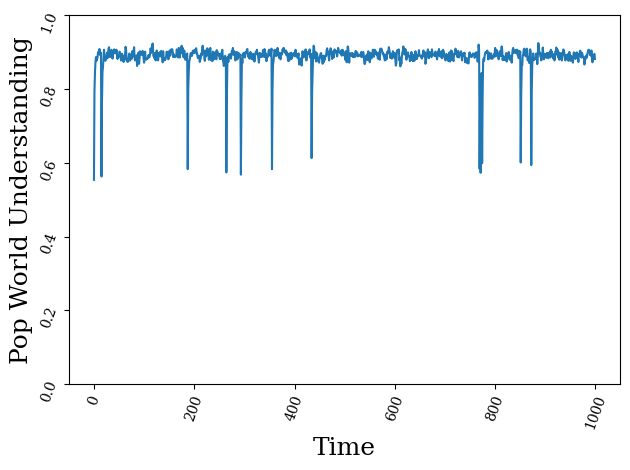

In [82]:
print('collective model understanding')
axis_tick_size = 10
axis_font_size=18
plt.figure()
time_thresh = 1000
plt.plot(range(params_dict['n_records'])[:time_thresh], learner_adaptation[:time_thresh])
plt.ylim((0,1))
plt.ylabel("Pop World Understanding", fontfamily='serif', fontsize=axis_font_size)
plt.xlabel("Time", fontfamily='serif', fontsize=axis_font_size)
plt.xticks(fontfamily='serif', fontsize=axis_tick_size, rotation=70)
plt.yticks(fontfamily='serif', fontsize=axis_tick_size, rotation=70)
plt.tight_layout()
# plt.savefig(dname+f"{params_dict['sim_name']}-population_adap.pdf", dpi=300)
#plt.close()

In [83]:
len(learner_adaptation)

200000

## Feedback loops simulation 2.3
### Agents are critical social learners that can learn individually or socially from the AI
### AI learns socially from the mean or mode of the population
### Socially learning from the AI lowers ability to learn individually, learning individually recovers it

collective model understanding


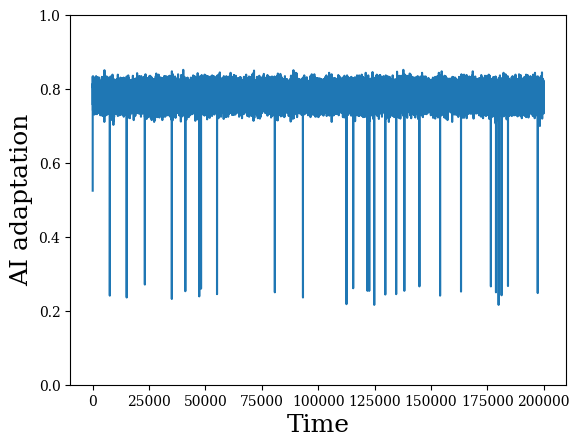

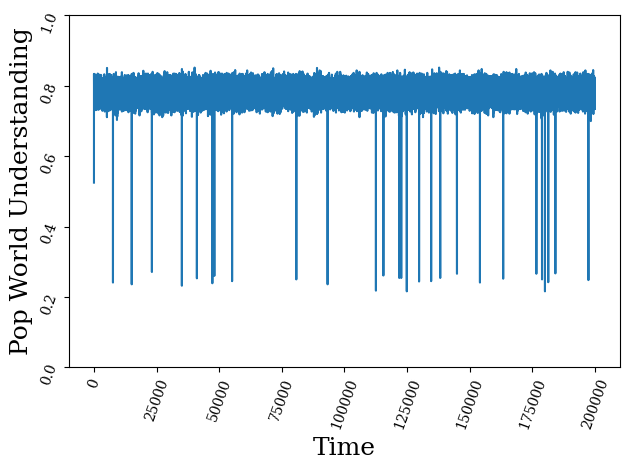

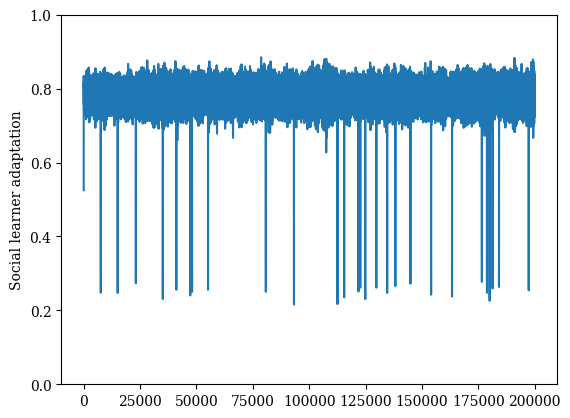

0.7820177949999999


In [76]:

params_dict = copy.copy(base_params_dict) 
params_dict['social_learning_mode'] = 'ai'
params_dict['ind_penalty_mult'] = 0.9
params_dict['critical'] = True 
params_dict['sec_3_1_1_choose_teacher'] = 'sec_4_neg_feedback'

social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], resignation=params_dict["resignation"], resignation_hint=params_dict["resignation_hint"], critical=params_dict["critical"], 
    ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

### Feedback loop but can social learn from humans too
### Eventually phases out AI

collective model understanding


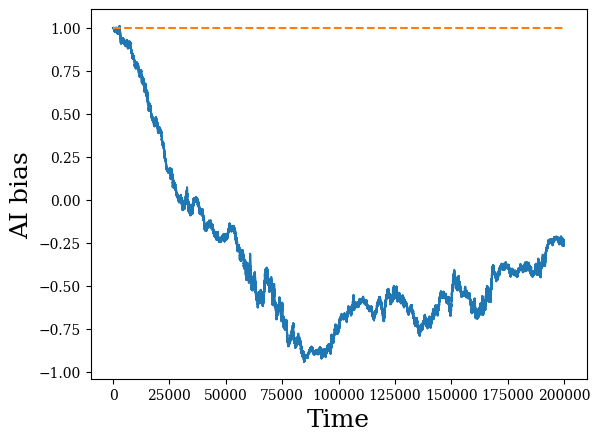

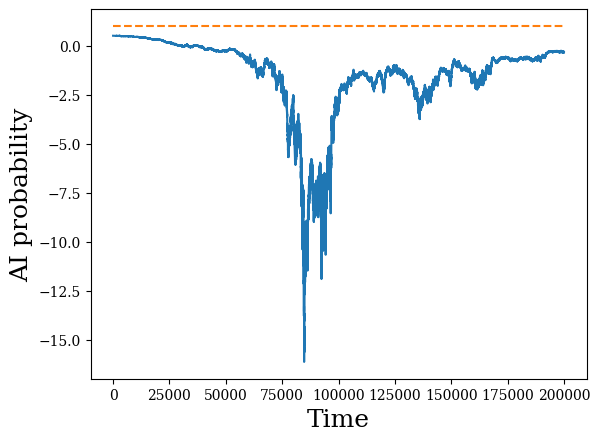

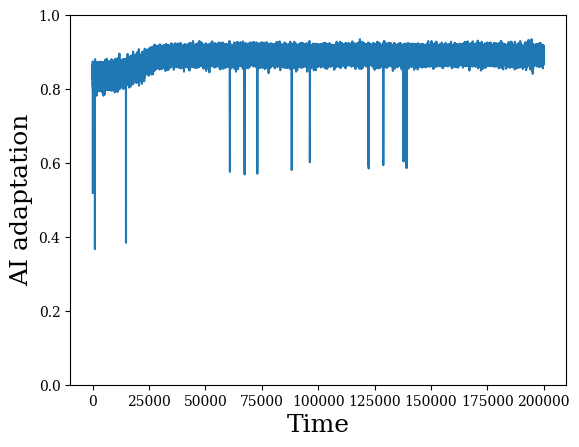

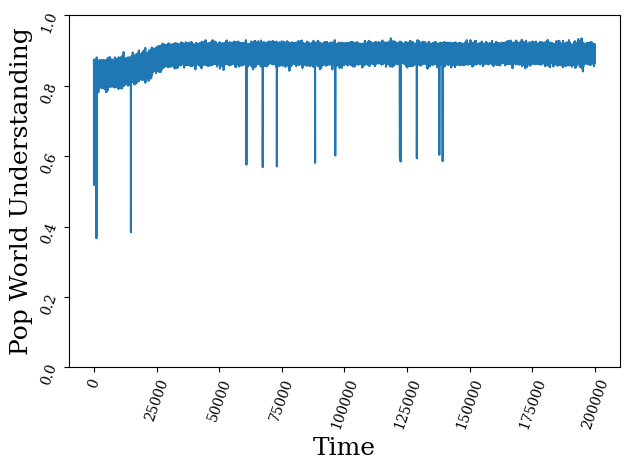

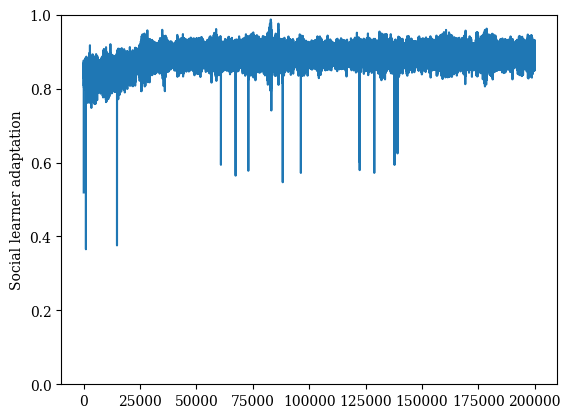

0.8864861850000001


In [77]:


params_dict = copy.copy(base_params_dict) 
params_dict['social_learning_mode'] = 'both'
params_dict['ind_penalty_mult'] = 0.9
params_dict['critical'] = True 
params_dict['sim_name'] = 'sec_4_neg_feedback_phase_out'

social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], resignation=params_dict["resignation"], resignation_hint=params_dict["resignation_hint"], critical=params_dict["critical"], 
    ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

In [78]:
# Need to refactor code a little more to add the plotting functions from here (specifically need to add counter for learning from AI vs humans). 

import matplotlib.pyplot as plt
inds=np.where(change_points)
plt.plot(range(params_dict['n_records']), social_freqs)
plt.ylim((0,1))
plt.scatter(inds, np.array(change_points)[inds]-1)
plt.ylabel("Social Learner Freq.")
plt.show()

plt.plot(range(params_dict['n_records']), ai_adaptation)
plt.ylim((0,1))
# plt.plot([0,params_dict['n_records']],[1,1],linestyle='--')
plt.ylabel("AI adaptation")
plt.show()

window_size = 1
averaged_adaptation = np.convolve(social_learner_adaptation, np.ones(window_size)/window_size, mode='valid')
plt.plot(list(range(params_dict['n_records']))[window_size-1:], averaged_adaptation)
plt.ylim((0,1))
# plt.plot([0,params_dict['n_records']],[1,1],linestyle='--')
plt.ylabel("Social learner adaptation")
plt.show()

k=200000
inds=np.where(change_points[:k])
plt.plot(range(params_dict['n_records'])[:k], (ai_biases)[:k])
plt.plot([0,min(params_dict['n_records'],k)],[0,0],linestyle='--')
plt.scatter(inds, np.array(change_points)[inds]-1)
plt.ylabel("AI bias")
plt.show()
plt.plot(range(params_dict['n_records'])[:k], (ai_biases/(ai_biases+1))[:k])
plt.plot([0,min(params_dict['n_records'],k)],[0,0],linestyle='--')
plt.scatter(inds, np.array(change_points)[inds]-1)
plt.ylabel("AI prob")
plt.show()
plt.plot(range(params_dict['n_records'])[:k], ai_learn_freqs[:k],label="from AI")
plt.plot(range(params_dict['n_records'])[:k], human_learn_freqs[:k],label="from human")

plt.ylim((0,1))
# plt.plot([0,params_dict['n_records']],[1,1],linestyle='--')
plt.ylabel("Learning socially freq")
plt.legend()
plt.savefig("feedback_critical_fromboth_social_learning_freq.png")
plt.show()
plt.plot(range(params_dict['n_records'])[:k], learner_adaptation[:k])
plt.ylim((0,1))
# plt.plot([0,params_dict['n_records']],[1,1],linestyle='--')
plt.ylabel("Population adaptation")
plt.savefig("feedback_critical_fromboth_population_adaptation.png")

plt.show()
plt.plot(range(params_dict['n_records'])[:k], ind_penalties[:k])
plt.ylim((0,1))
# plt.plot([0,params_dict['n_records']],[1,1],linestyle='--')
plt.ylabel("Individual learning penalty")
plt.show()

NameError: name 'social_freqs' is not defined

## Model-centric simulation 3.2.1
### Agents are critical social learners
### AI can learn socially from the mean of the population or do nothing (i.e. vary c_ai)

In [55]:
import copy


params_dict_local_base = copy.copy(base_params_dict) 
params_dict_local_base['social_learning_mode'] = 'ai'
params_dict_local_base['critical'] = True 
params_dict_local_base['sim_name'] = 'sec_3_2_1_ai_update_freq'

world_change_rates = {'slow': 0.01, 'moderate': 0.05, 'fast': 0.2}
c_AI = np.arange(0, 1.01, 0.1)

world_scores = {}

for world_change, world_change_rate in world_change_rates.items(): 
    params_dict = copy.copy(params_dict_local_base)
    params_dict['u'] = world_change_rate
    
    scores = []

    for c in c_AI:

        social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
            N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=c,
            z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
            social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"]
        )
        scores.append(np.mean(learner_adaptation))
        # utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)

    world_scores[world_change] = scores

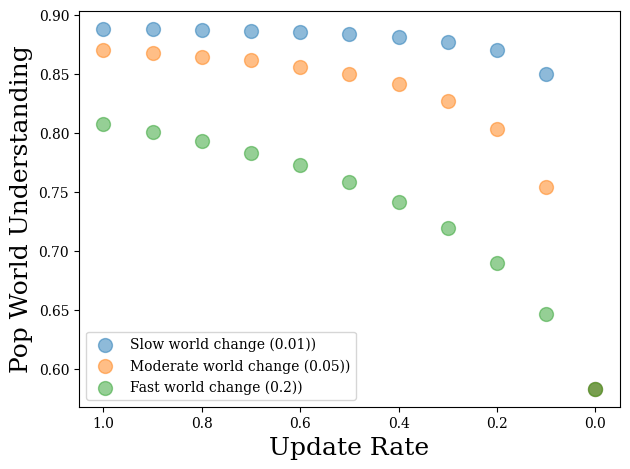

In [56]:
plt.figure()
for world_change, scores in world_scores.items(): 
    plt.scatter([1-x for x in c_AI], scores, s=100,label=f'{world_change.capitalize()} world change ({world_change_rates[world_change]}))', alpha=0.5)
plt.gca().invert_xaxis()  
plt.ylabel("Pop World Understanding", fontsize=18)
plt.xlabel("Update Rate", fontsize=18)
# plt.ylim([0.5, 1.05])
plt.legend()
plt.tight_layout()
plt.savefig("figures/update_schedule.pdf", dpi=400)

## Model-centric simulation 3.2.2
### Agents can learn individually or socially from the AI
### AI can learn individually or socially from the mean of the population

V2

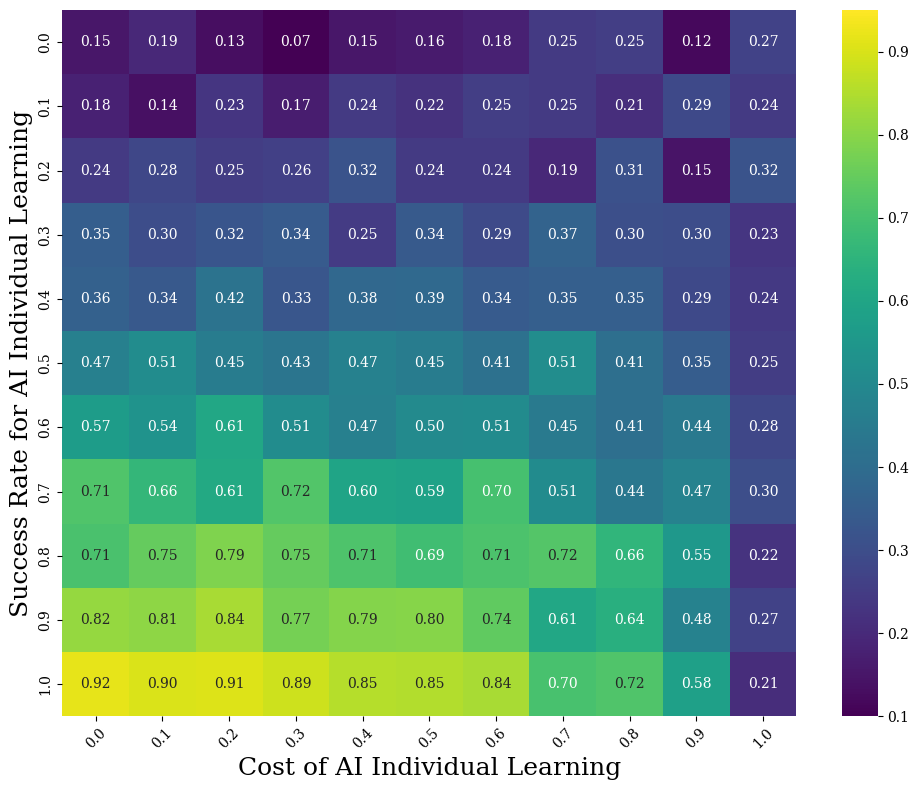

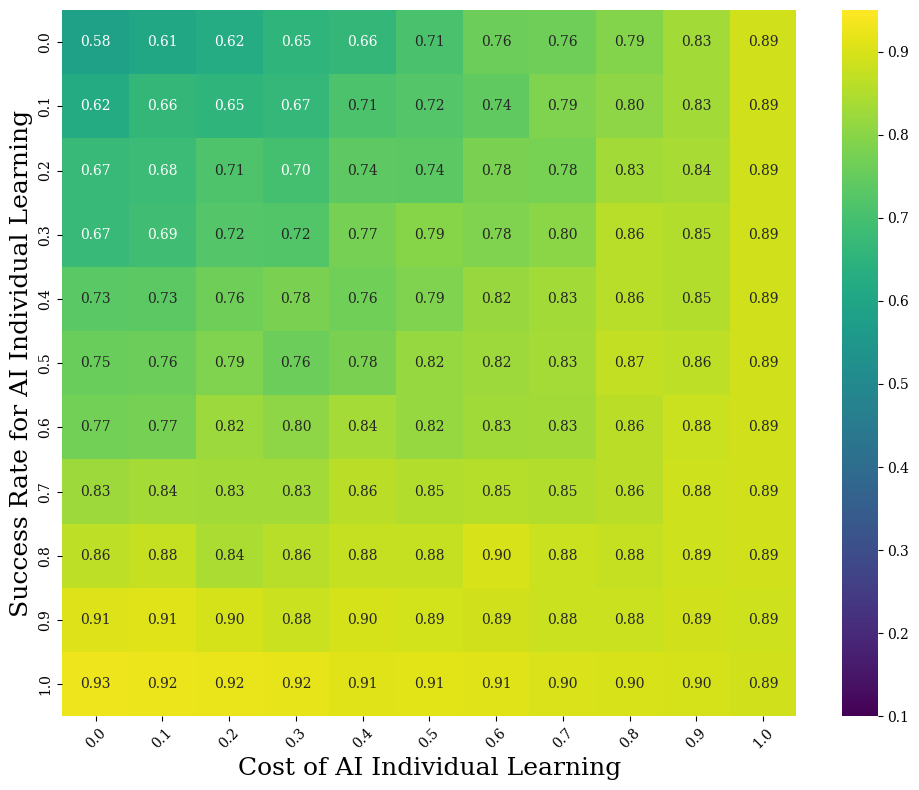

In [101]:


import copy


params_dict_local_base = copy.copy(base_params_dict) 
params_dict_local_base['social_learning_mode'] = 'ai'
params_dict_local_base['ai_individ_learn'] = True
params_dict_local_base['sim_name'] = 'sec_3_2_2_ai_individ_learn'
params_dict_local_base['n_records'] = 100

z_AI = np.arange(0, 1.1, 0.1)
c_AI_i = np.arange(0, 1.1, 0.1)
critical_vary = [False, True]
importlib.reload(utils)

for allow_critical in critical_vary: 
    all_scores = []
    for z in z_AI: 
        scores = []
        for c in c_AI_i: 
            
            params_dict = copy.copy(params_dict_local_base)
            params_dict['z_AI_i'] = z
            params_dict['c_AI_i'] = c
            params_dict['critical'] = allow_critical
            social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
                N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=c,
                z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
                social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"],
                ai_individ_learn=params_dict['ai_individ_learn'], c_AI_i=params_dict['c_AI_i'], z_AI_i=params_dict['z_AI_i']
            )
            scores.append(np.mean(learner_adaptation))
        all_scores.append(scores)

    utils.get_heatmap(params_dict, all_scores, xvals=c_AI_i, yvals=z_AI, xlabel='Cost of AI Individual Learning',
                    ylabel='Success Rate for AI Individual Learning', vmin=0.10, vmax=0.95, plt_tag=f'heatmap-critical{allow_critical}')


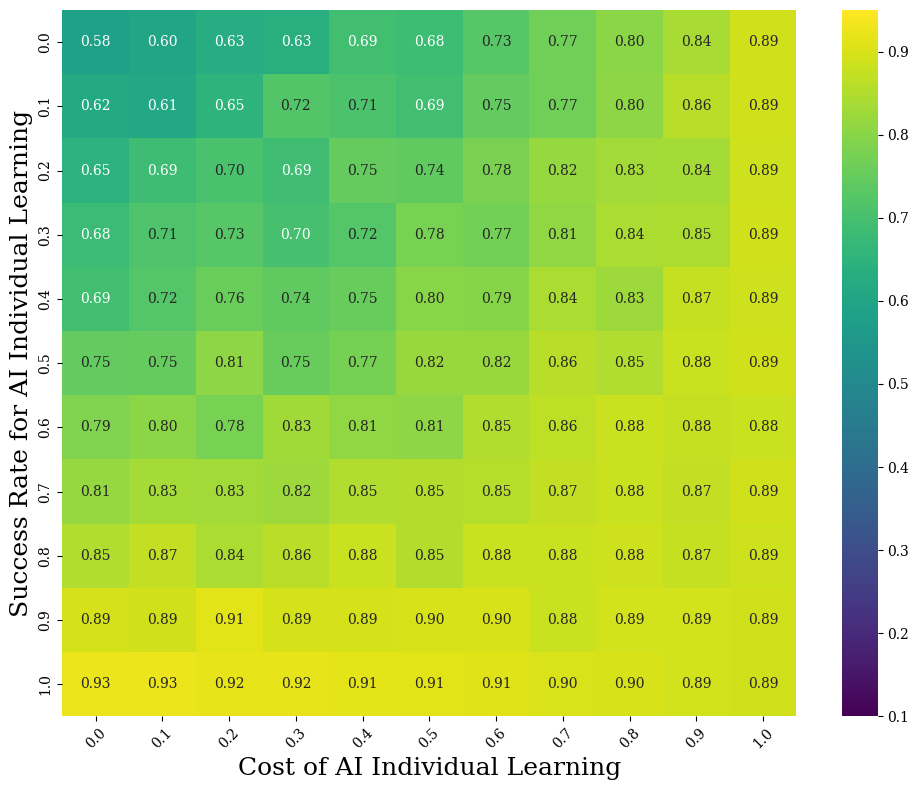

In [100]:


import copy


params_dict_local_base = copy.copy(base_params_dict) 
params_dict_local_base['social_learning_mode'] = 'ai'
params_dict_local_base['critical'] = True 
params_dict_local_base['ai_individ_learn'] = True
params_dict_local_base['sim_name'] = 'sec_3_2_2_ai_individ_learn'
params_dict_local_base['n_records'] = 100

z_AI = np.arange(0, 1.1, 0.1)
c_AI_i = np.arange(0, 1.1, 0.1)
importlib.reload(utils)
all_scores = []
for z in z_AI: 
    scores = []
    for c in c_AI_i: 
        
        params_dict = copy.copy(params_dict_local_base)
        params_dict['z_AI_i'] = z
        params_dict['c_AI_i'] = c
        social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation = simulation.run_simulation(
            N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=c,
            z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], n_records=params_dict["n_records"],
            social_learning_mode=params_dict["social_learning_mode"], critical=params_dict["critical"], ind_penalty_mult=params_dict["ind_penalty_mult"], learn_twice=params_dict["learn_twice"],
            ai_individ_learn=params_dict['ai_individ_learn'], c_AI_i=params_dict['c_AI_i'], z_AI_i=params_dict['z_AI_i']
        )
        scores.append(np.mean(learner_adaptation))
    all_scores.append(scores)

utils.get_heatmap(params_dict, all_scores, xvals=c_AI_i, yvals=z_AI, xlabel='Cost of AI Individual Learning',
                  ylabel='Success Rate for AI Individual Learning', vmin=0.10, vmax=0.95)
